# Exploratory Data Analysis (EDA) and Data Preprocessing

in this notebook we are going to explore dataset and perform necessary task needed for models training.

## 1. Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
from tqdm import tqdm

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('darkgrid')

In [3]:
df = pd.read_excel('Dataset.xlsx')
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df.set_index('Date' , inplace=True)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,BTC/USD
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01,-1.00,-1.00,-1.00,-0.76,-1.00,-1.00,-0.88,-1.00,-1.00,-0.07,-0.36,-1.00,-1.00,-1.00,-0.86,-0.99,-0.88,-0.92,-0.88,-0.92,-0.72,0.22,-0.71,-0.22,-0.71,0.97,0.90,0.79,-0.60,-0.58,-0.70,0.05,0.91,-0.66,-0.94,-0.99,-1.00,-1.00,0.06,0.15,0.99,-0.98
2014-01-02,-0.85,-0.84,-1.00,-0.57,-1.00,-1.00,-0.95,-1.00,-1.00,-0.61,-0.71,-0.94,-0.95,-0.95,-0.84,-0.99,-0.88,-0.93,-0.86,-0.93,-0.74,0.20,-0.75,-0.27,-0.71,0.97,0.85,0.75,-0.52,-0.62,-0.65,0.04,0.85,-0.66,-0.94,-0.99,-1.00,-1.00,0.06,0.15,0.99,-0.98
2014-01-03,-0.87,-0.87,-1.00,-0.57,-1.00,-1.00,-0.93,-1.00,-1.00,-0.74,-0.67,-0.93,-0.92,-0.92,-0.66,-0.98,-0.88,-0.93,-0.87,-0.94,-0.74,0.20,-0.74,-0.25,-0.71,0.98,0.80,0.74,-0.45,-0.61,-0.63,0.02,0.83,-0.66,-0.94,-0.99,-1.00,-1.00,0.06,0.15,0.99,-0.98
2014-01-04,-0.89,-0.88,-1.00,-0.57,-1.00,-1.00,-0.93,-1.00,-1.00,-0.66,-0.63,-0.97,-0.96,-0.96,-0.76,-0.99,-0.88,-0.93,-0.87,-0.94,-0.74,0.20,-0.74,-0.25,-0.71,0.98,0.80,0.74,-0.45,-0.61,-0.63,0.02,0.83,-0.66,-0.94,-0.99,-1.00,-1.00,0.19,-0.21,0.99,-0.98
2014-01-05,-0.91,-0.93,-1.00,-0.71,-1.00,-1.00,-0.90,-1.00,-0.99,-0.67,-0.54,-0.94,-0.93,-0.93,-0.66,-0.98,-0.88,-0.93,-0.87,-0.94,-0.74,0.20,-0.74,-0.25,-0.71,0.98,0.80,0.74,-0.45,-0.61,-0.63,0.02,0.83,-0.66,-0.94,-0.99,-1.00,-1.00,0.19,-0.21,0.99,-0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,0.32,0.21,1.00,-0.81,0.29,0.41,0.09,-0.95,-0.93,-0.83,0.13,0.08,-0.04,-0.01,-0.94,-0.60,-0.39,0.99,-0.80,-0.04,0.98,0.49,0.97,0.96,0.66,0.13,-0.21,-0.20,-0.38,-0.23,0.53,0.69,0.12,0.87,1.00,0.51,1.00,-0.86,-0.13,-0.82,-0.80,0.54
2021-08-28,0.19,0.05,1.00,-0.79,0.24,0.41,0.08,-0.95,-0.93,-0.71,0.33,-0.08,-0.22,-0.19,-0.99,-0.75,-0.39,0.99,-0.80,-0.04,0.98,0.49,0.97,0.96,0.66,0.13,-0.21,-0.20,-0.38,-0.23,0.53,0.69,0.12,0.87,1.00,0.55,1.00,-0.87,-0.14,-0.78,-0.80,0.54
2021-08-29,0.07,-0.20,1.00,-0.95,0.38,0.41,0.20,-0.96,-0.93,-0.63,0.66,-0.21,-0.34,-0.31,-1.00,-0.78,-0.39,0.99,-0.80,-0.04,0.98,0.49,0.97,0.96,0.66,0.13,-0.21,-0.20,-0.38,-0.23,0.53,0.69,0.12,0.87,1.00,0.54,1.00,-0.95,-0.14,-0.78,-0.80,0.53


In [4]:
print(f'This data set has {df.shape[0]} records and {df.shape[1]} features.')

This data set has 2800 records and 42 features.


In [5]:
df.isna().sum()

X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10        0
X11        0
X12        0
X13        0
X14        0
X15        0
X16        0
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25        0
X26        0
X27        0
X28        0
X29        0
X30        0
X31        0
X32        0
X33        0
X34        0
X35        0
X36        0
X37        0
X38        0
X39        0
X40        0
X41        0
BTC/USD    0
dtype: int64

as you can see in the cell above there are no missing values in any of the features.

In [6]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,BTC/USD
count,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00
mean,0.06,0.04,-0.19,-0.52,-0.57,-0.53,-0.73,-0.92,-0.91,-0.80,-0.72,-0.26,-0.18,-0.16,-0.68,-0.85,-0.73,-0.36,-0.78,-0.32,-0.30,0.30,-0.13,0.06,-0.20,-0.05,-0.30,-0.16,0.19,-0.18,-0.35,-0.35,-0.10,-0.45,-0.33,-0.76,0.25,-0.91,-0.46,-0.38,0.20,-0.75
std,0.49,0.51,0.63,0.25,0.53,0.58,0.33,0.18,0.21,0.19,0.31,0.38,0.42,0.42,0.21,0.23,0.35,0.47,0.20,0.31,0.45,0.37,0.43,0.32,0.45,0.53,0.45,0.48,0.44,0.44,0.47,0.38,0.40,0.50,0.51,0.39,0.57,0.16,0.36,0.34,0.67,0.39
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,-0.30,-0.35,-0.80,-0.69,-0.99,-0.99,-0.97,-1.00,-1.00,-0.92,-0.96,-0.51,-0.48,-0.47,-0.84,-0.99,-0.98,-0.75,-0.90,-0.46,-0.66,0.08,-0.50,-0.17,-0.55,-0.53,-0.60,-0.51,-0.15,-0.48,-0.65,-0.56,-0.38,-0.75,-0.74,-0.99,-0.18,-1.00,-0.70,-0.64,-0.38,-0.99
50%,0.16,0.13,-0.26,-0.59,-0.90,-0.89,-0.84,-0.99,-0.98,-0.86,-0.80,-0.23,-0.12,-0.11,-0.73,-0.93,-0.80,-0.44,-0.84,-0.31,-0.36,0.32,-0.10,0.06,-0.22,-0.05,-0.44,-0.35,0.31,-0.24,-0.52,-0.40,-0.15,-0.60,-0.25,-0.89,0.35,-0.97,-0.51,-0.45,-0.01,-0.88
75%,0.42,0.47,0.35,-0.41,-0.14,0.02,-0.62,-0.94,-0.92,-0.77,-0.64,-0.01,0.17,0.18,-0.57,-0.82,-0.69,-0.13,-0.72,-0.14,-0.11,0.60,0.14,0.27,0.05,0.38,-0.13,0.19,0.54,0.01,-0.14,-0.17,0.06,-0.47,-0.19,-0.72,0.75,-0.88,-0.30,-0.19,0.95,-0.72
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## 2. Features Line Plot

42it [00:04,  8.90it/s]


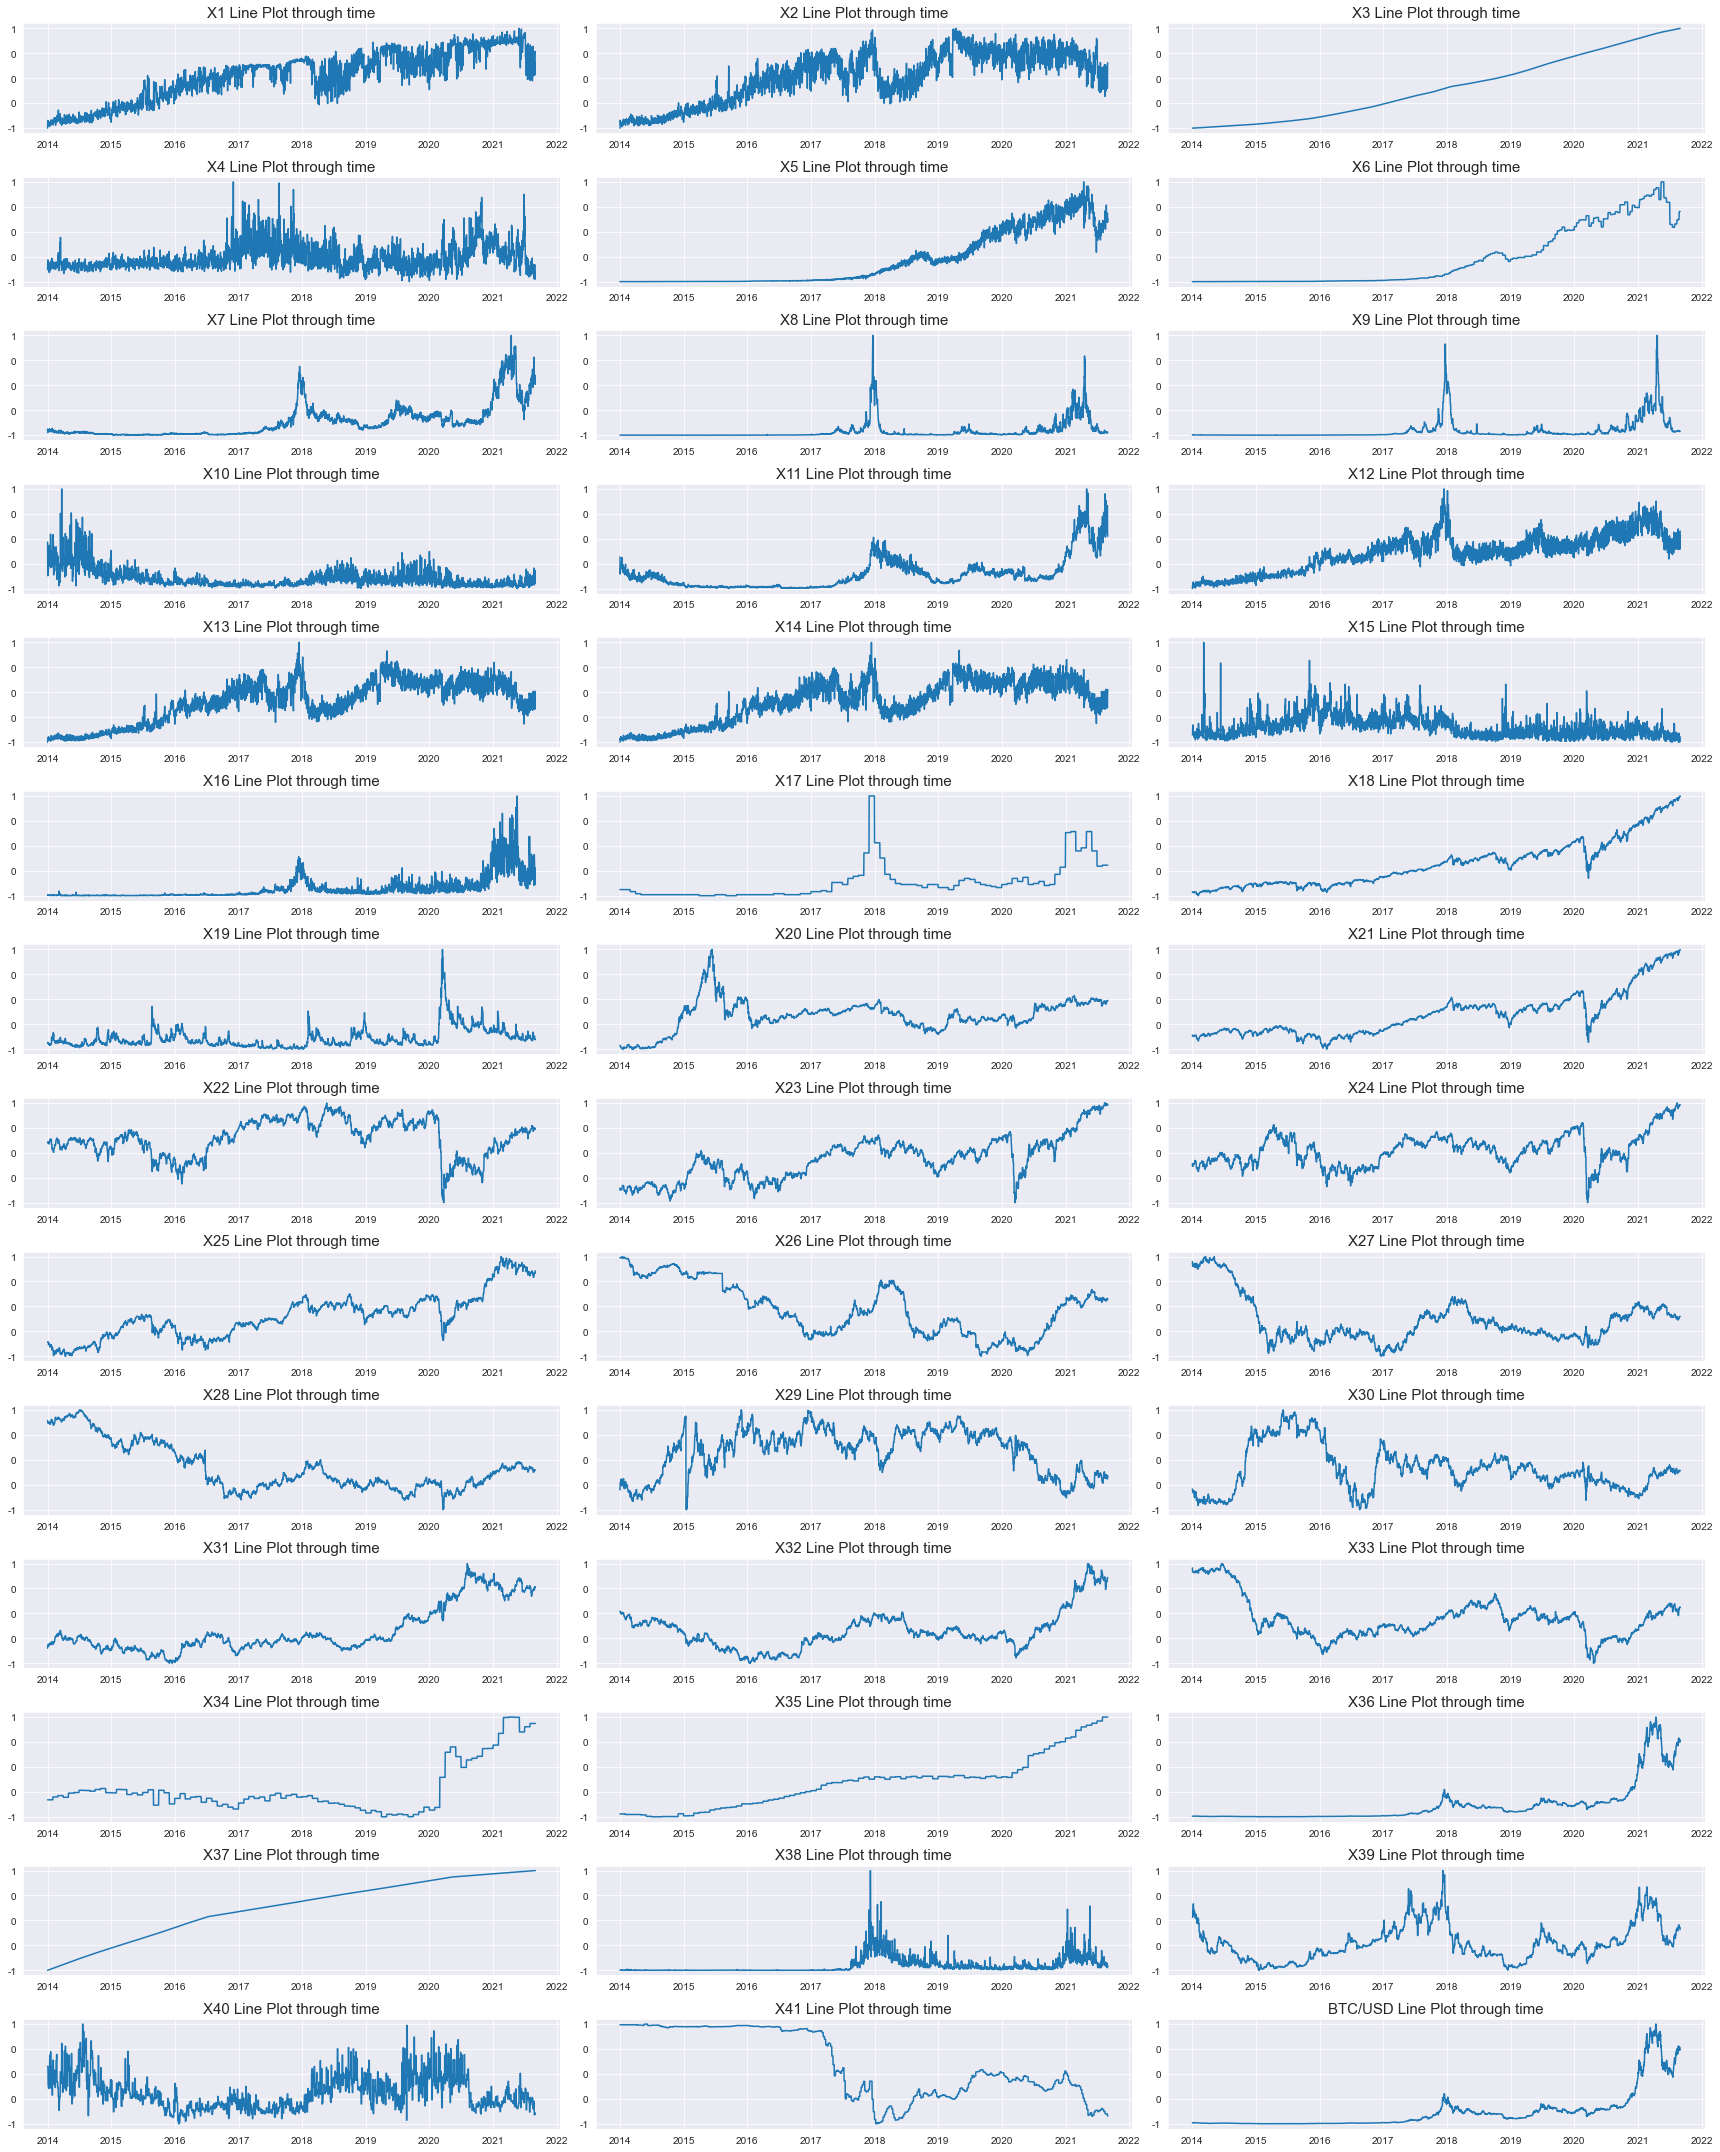

In [7]:
fig, axes = plt.subplots(14, 3, figsize=(24,30))
axes = axes.ravel()

cols = list(df.columns)


for col, i in tqdm(zip(cols, range(0, 42))):
    sns.lineplot(data=df, x='Date', y=col, ax=axes[i])
    axes[i].set_title(f'{col} Line Plot through time', fontdict={'fontsize': 15})
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

## 3. Adding Moving Averages

In [8]:
df['X1_MA'] = df['X1'].rolling(window=30, min_periods=1).mean()
df['X2_MA'] = df['X2'].rolling(window=30, min_periods=1).mean()
df['X4_MA'] = df['X4'].rolling(window=30, min_periods=1).mean()
df['X5_MA'] = df['X5'].rolling(window=7, min_periods=1).mean()
df['X10_MA'] = df['X10'].rolling(window=30, min_periods=1).mean()
df['X11_MA'] = df['X11'].rolling(window=7, min_periods=1).mean()
df['X12_MA'] = df['X12'].rolling(window=30, min_periods=1).mean()
df['X13_MA'] = df['X13'].rolling(window=7, min_periods=1).mean()
df['X14_MA'] = df['X14'].rolling(window=7, min_periods=1).mean()
df['X15_MA'] = df['X15'].rolling(window=7, min_periods=1).mean()
df['X16_MA'] = df['X16'].rolling(window=7, min_periods=1).mean()
df['X38_MA'] = df['X38'].rolling(window=7, min_periods=1).mean()
df['X40_MA'] = df['X40'].rolling(window=30, min_periods=1).mean()
df.drop(columns=['X1', 'X2', 'X4', 'X5', 'X10', 'X11', 'X12','X13', 'X14', 'X15', 'X16', 'X38', 'X40'], inplace=True)
df.to_csv('Dataset.csv')
df

,X3,X6,X7,X8,X9,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X39,X41,BTC/USD,X1_MA,X2_MA,X4_MA,X5_MA,X10_MA,X11_MA,X12_MA,X13_MA,X14_MA,X15_MA,X16_MA,X38_MA,X40_MA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01,-1.00,-1.00,-0.88,-1.00,-1.00,-0.88,-0.92,-0.88,-0.92,-0.72,0.22,-0.71,-0.22,-0.71,0.97,0.90,0.79,-0.60,-0.58,-0.70,0.05,0.91,-0.66,-0.94,-0.99,-1.00,0.06,0.99,-0.98,-1.00,-1.00,-0.76,-1.00,-0.07,-0.36,-1.00,-1.00,-1.00,-0.86,-0.99,-1.00,0.15
2014-01-02,-1.00,-1.00,-0.95,-1.00,-1.00,-0.88,-0.93,-0.86,-0.93,-0.74,0.20,-0.75,-0.27,-0.71,0.97,0.85,0.75,-0.52,-0.62,-0.65,0.04,0.85,-0.66,-0.94,-0.99,-1.00,0.06,0.99,-0.98,-0.92,-0.92,-0.66,-1.00,-0.34,-0.54,-0.97,-0.97,-0.97,-0.85,-0.99,-1.00,0.15
2014-01-03,-1.00,-1.00,-0.93,-1.00,-1.00,-0.88,-0.93,-0.87,-0.94,-0.74,0.20,-0.74,-0.25,-0.71,0.98,0.80,0.74,-0.45,-0.61,-0.63,0.02,0.83,-0.66,-0.94,-0.99,-1.00,0.06,0.99,-0.98,-0.90,-0.90,-0.63,-1.00,-0.47,-0.58,-0.96,-0.96,-0.95,-0.78,-0.99,-1.00,0.15
2014-01-04,-1.00,-1.00,-0.93,-1.00,-1.00,-0.88,-0.93,-0.87,-0.94,-0.74,0.20,-0.74,-0.25,-0.71,0.98,0.80,0.74,-0.45,-0.61,-0.63,0.02,0.83,-0.66,-0.94,-0.99,-1.00,0.19,0.99,-0.98,-0.90,-0.90,-0.62,-1.00,-0.52,-0.59,-0.96,-0.96,-0.95,-0.78,-0.99,-1.00,0.06
2014-01-05,-1.00,-1.00,-0.90,-1.00,-0.99,-0.88,-0.93,-0.87,-0.94,-0.74,0.20,-0.74,-0.25,-0.71,0.98,0.80,0.74,-0.45,-0.61,-0.63,0.02,0.83,-0.66,-0.94,-0.99,-1.00,0.19,0.99,-0.98,-0.90,-0.90,-0.64,-1.00,-0.55,-0.58,-0.96,-0.95,-0.95,-0.75,-0.99,-1.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,1.00,0.41,0.09,-0.95,-0.93,-0.39,0.99,-0.80,-0.04,0.98,0.49,0.97,0.96,0.66,0.13,-0.21,-0.20,-0.38,-0.23,0.53,0.69,0.12,0.87,1.00,0.51,1.00,-0.13,-0.80,0.54,0.29,0.04,-0.77,0.32,-0.85,0.37,0.02,-0.09,-0.06,-0.89,-0.42,-0.87,-0.59
2021-08-28,1.00,0.41,0.08,-0.95,-0.93,-0.39,0.99,-0.80,-0.04,0.98,0.49,0.97,0.96,0.66,0.13,-0.21,-0.20,-0.38,-0.23,0.53,0.69,0.12,0.87,1.00,0.55,1.00,-0.14,-0.80,0.54,0.29,0.04,-0.77,0.31,-0.85,0.33,0.02,-0.09,-0.06,-0.90,-0.46,-0.88,-0.59
2021-08-29,1.00,0.41,0.20,-0.96,-0.93,-0.39,0.99,-0.80,-0.04,0.98,0.49,0.97,0.96,0.66,0.13,-0.21,-0.20,-0.38,-0.23,0.53,0.69,0.12,0.87,1.00,0.54,1.00,-0.14,-0.80,0.53,0.28,0.03,-0.78,0.32,-0.84,0.31,0.01,-0.09,-0.06,-0.90,-0.46,-0.89,-0.59


13it [00:01,  7.96it/s]


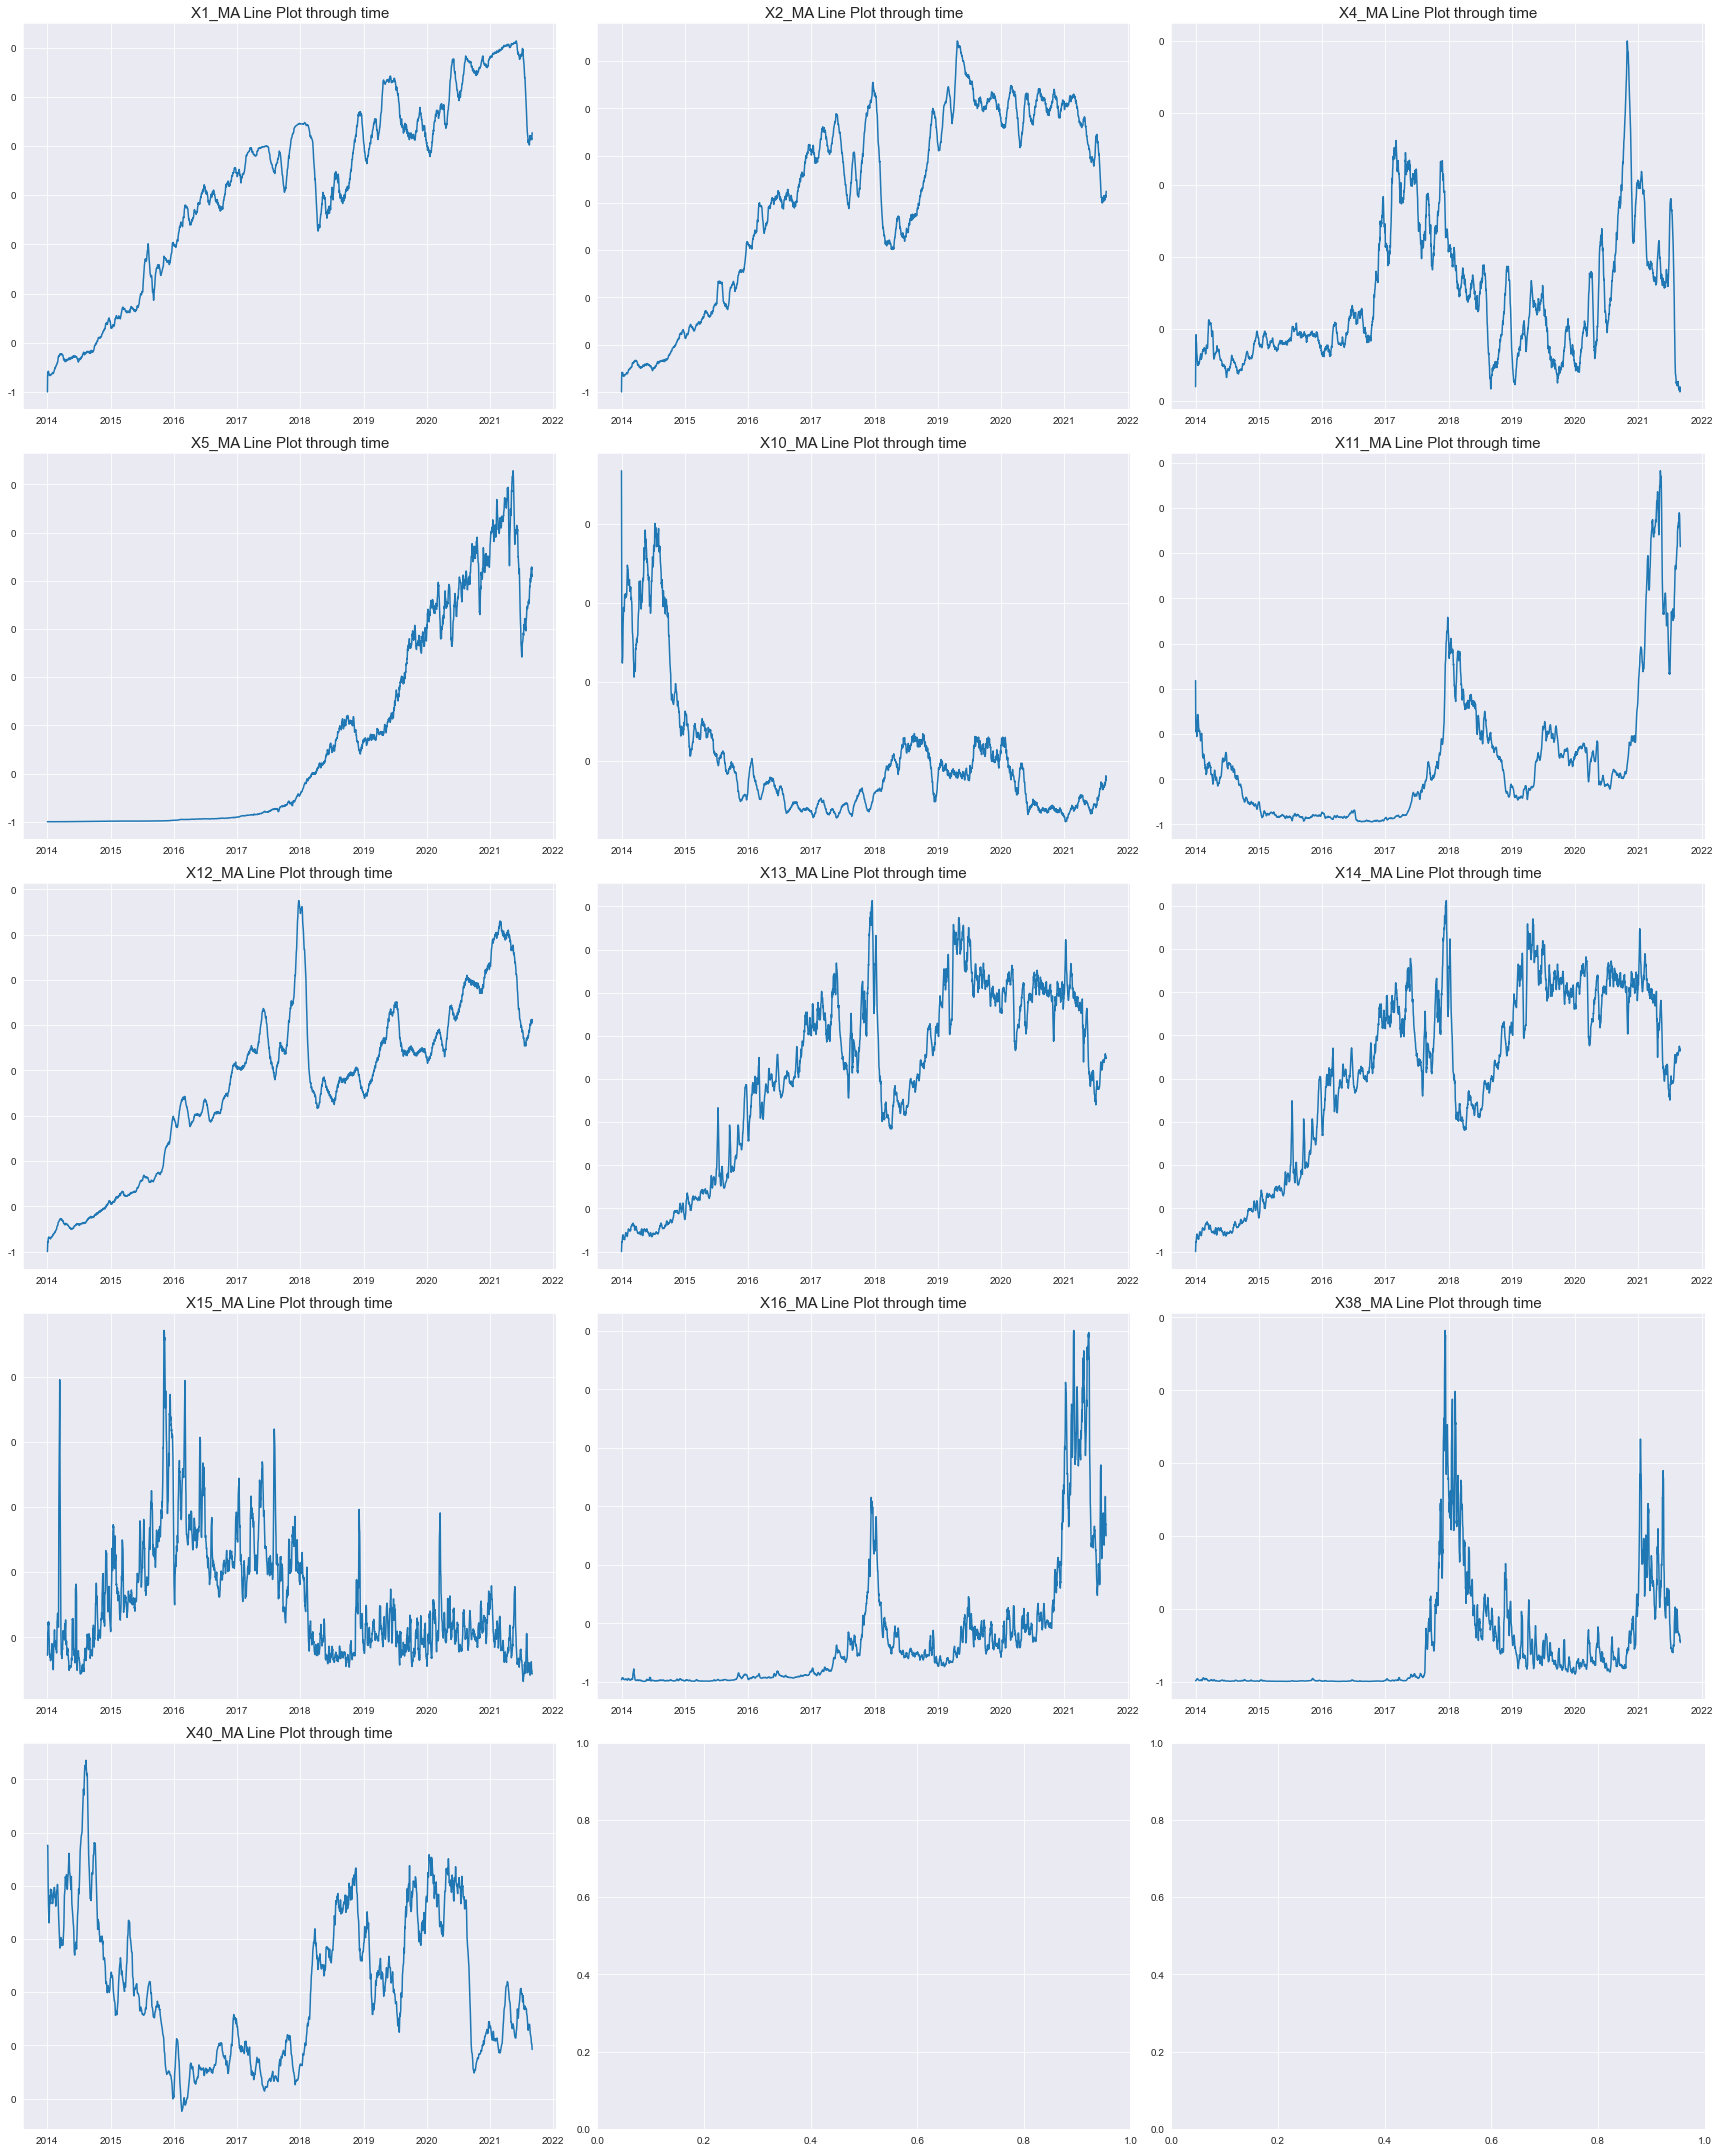

In [9]:
fig, axes = plt.subplots(5, 3, figsize=(24,30))
axes = axes.ravel()

cols = list(i for i in df.columns if 'MA' in i)


for col, i in tqdm(zip(cols, range(0, 42))):
    sns.lineplot(data=df, x='Date', y=col, ax=axes[i])
    axes[i].set_title(f'{col} Line Plot through time', fontdict={'fontsize': 15})
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

## 4. Violin Plot

42it [00:00, 55.16it/s]


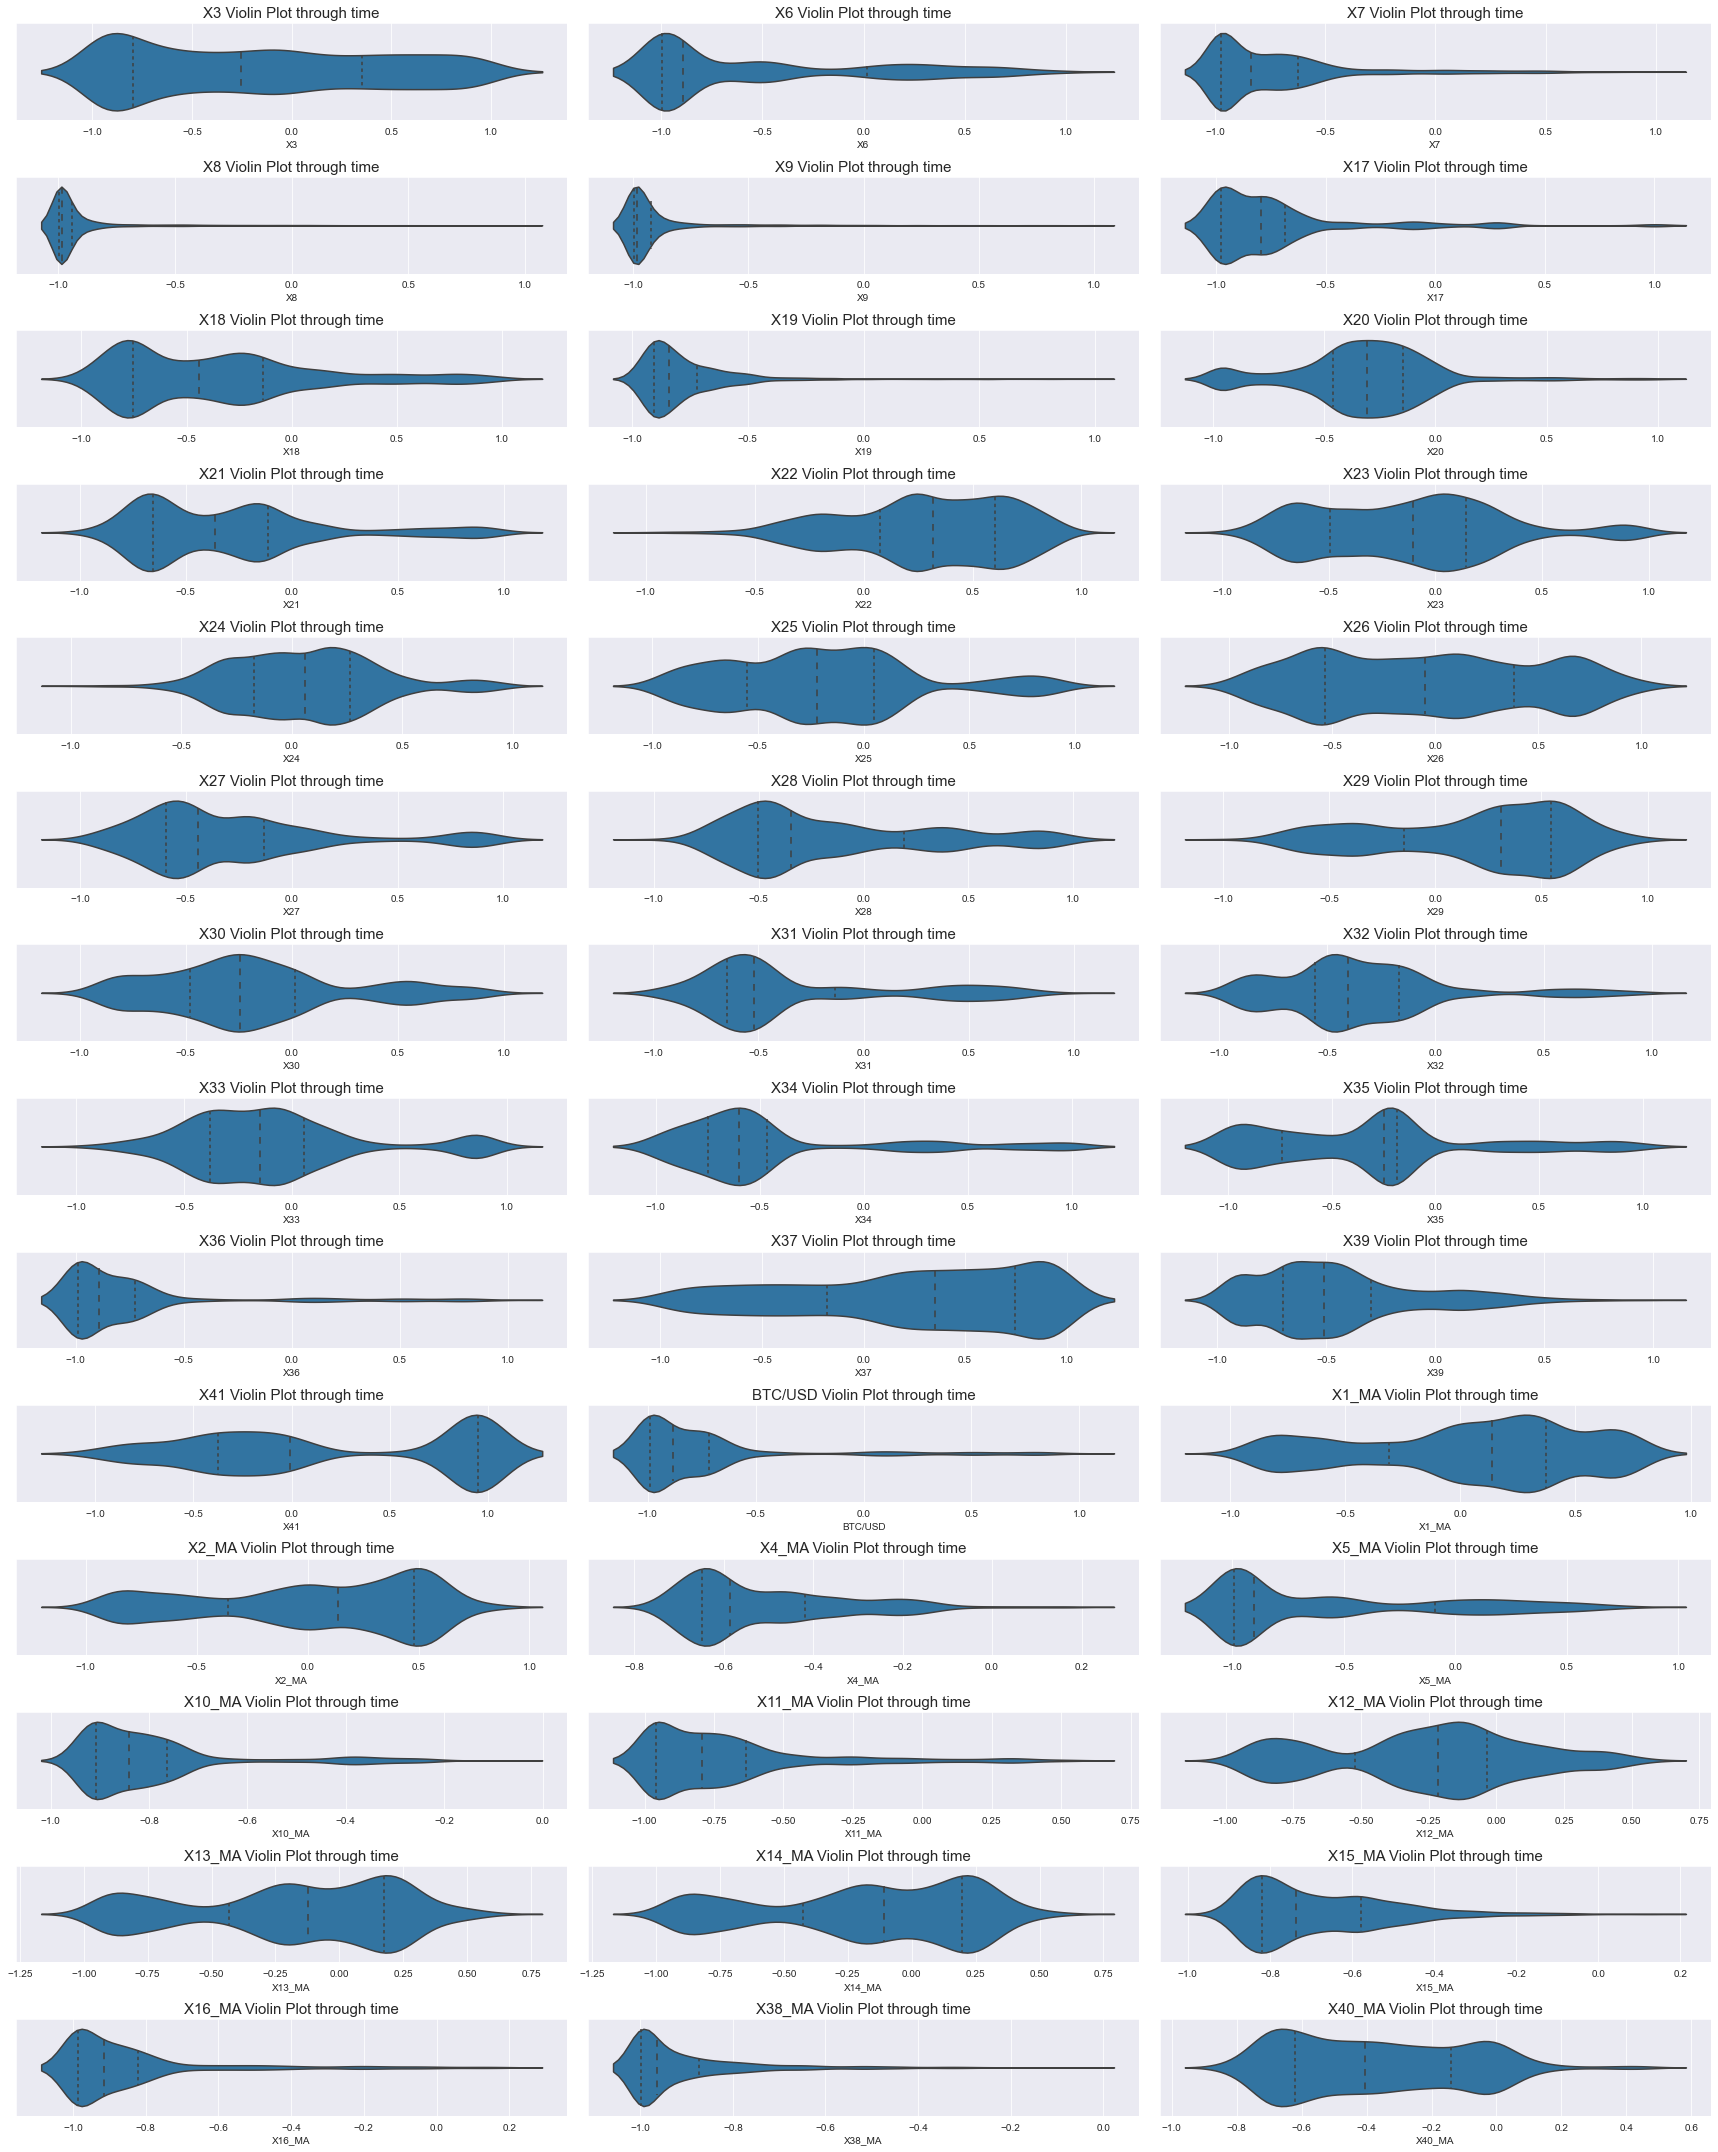

In [10]:
fig, axes = plt.subplots(14, 3, figsize=(24,30))
axes = axes.ravel()

for col, i in tqdm(zip(df.columns, range(0, 42))):
    sns.violinplot(data=df, x=col, inner='quart', split=True, ax=axes[i])
    axes[i].set_title(f'{col} Violin Plot through time', fontdict={'fontsize': 15})

plt.tight_layout()
plt.show()

## 4. Data Correlation

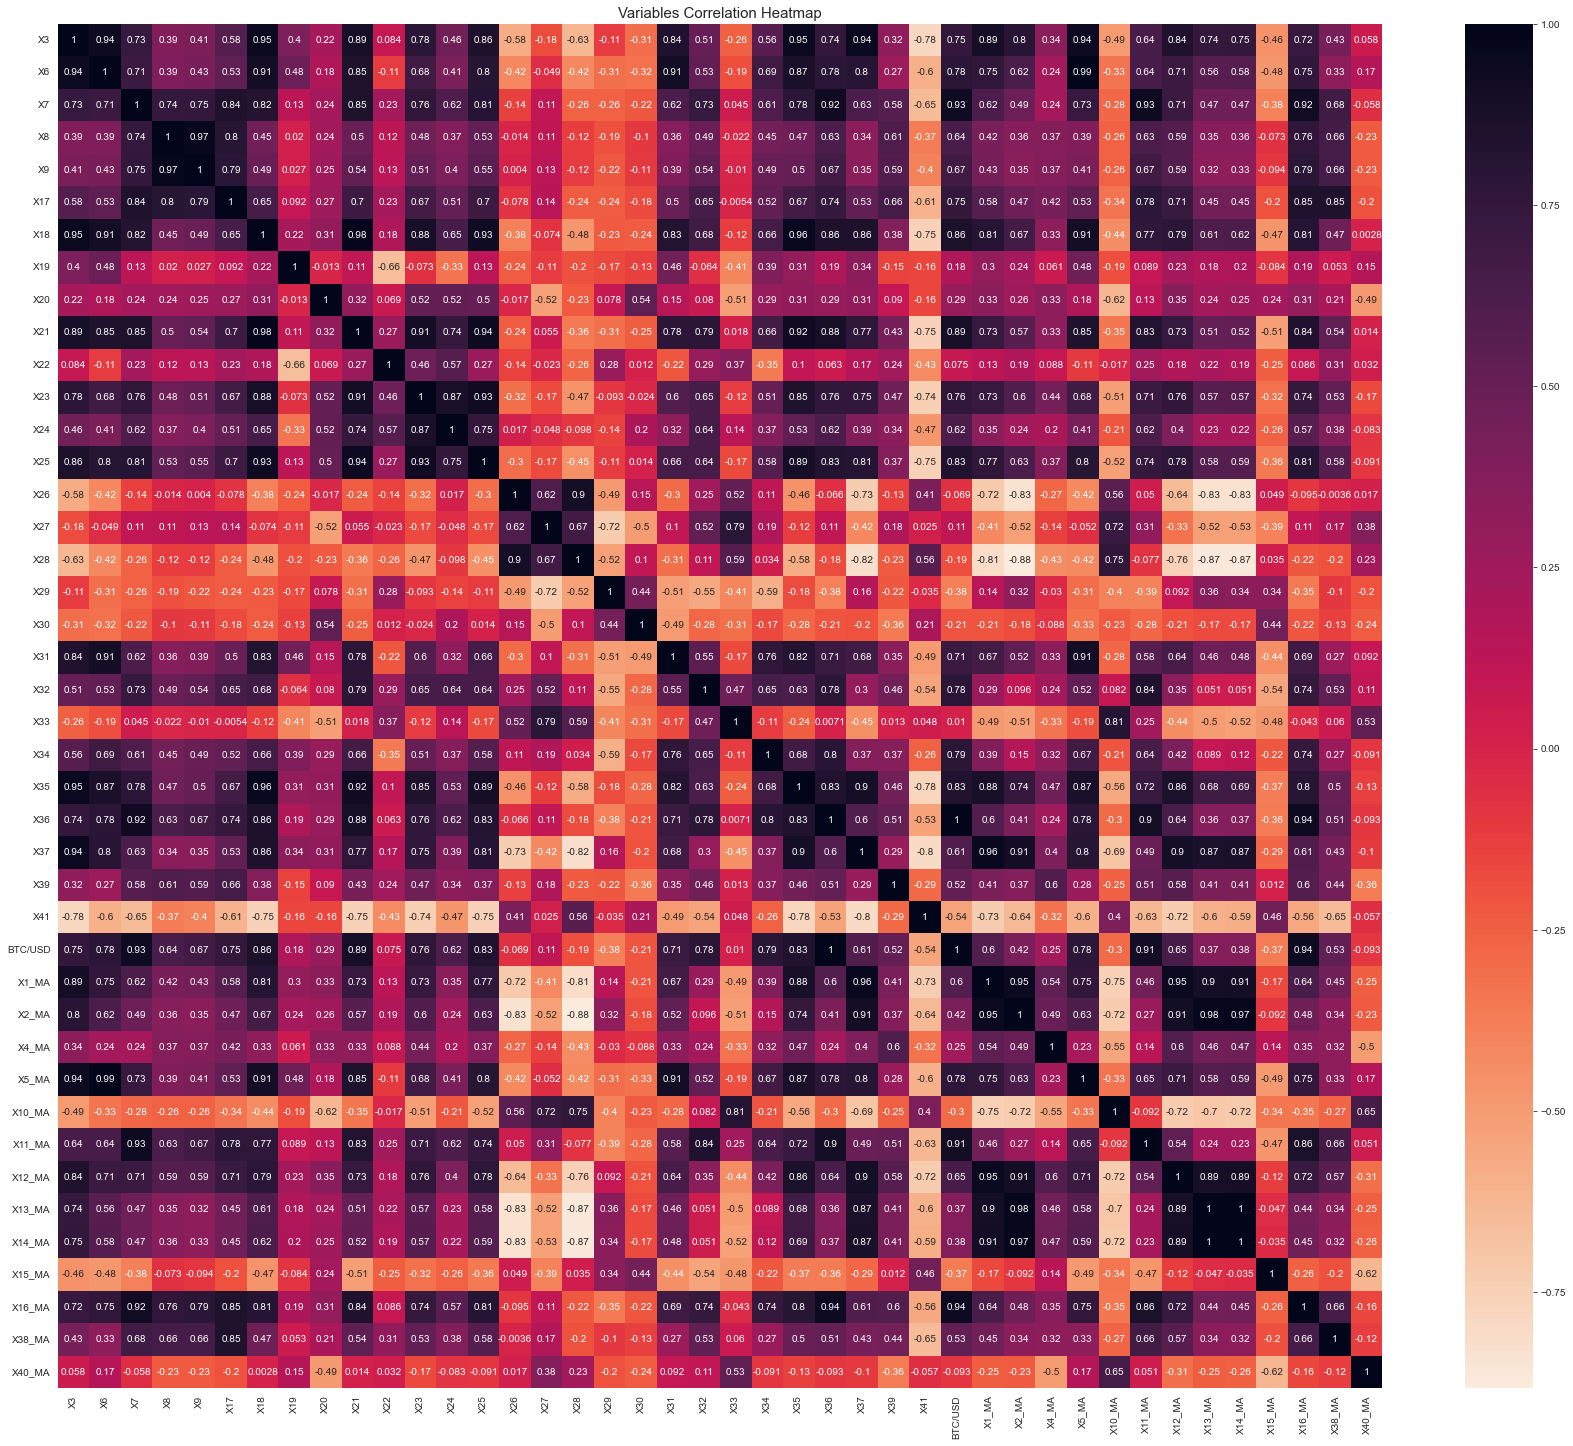

In [11]:
intercor = df.corr()
plt.figure(figsize=(24,20))
sns.heatmap(intercor,annot=True, cmap = 'rocket_r')
plt.tight_layout()
plt.title('Variables Correlation Heatmap', fontdict={'fontsize': 15})
plt.show()